# Ground tracks
## Computaitonal Astrodynamics 2023-2024
### Aspasia Pallikaridou

This jupyter notebook is about drawing the 24-hour ground tracks for five satellites with initial conditions at t = 0. These Satellites are the ISS, a Sentinel, a Molniya, and two Geosyncronous with one of them being geosationary. The first step was to fill in the functions in the astrodynamicslibrary.py in order to produce the required plots.
In the second part of the exercise, proper initial conditions for the Geostationary satellite (a = 42164.0, e = 0.0001, i = 0) such that it is located at the longitude of Thessaloniki were investigated.

A ground track is the path on the surface of a planet directly below a satellite's trajectory. It can also be described as the vertical projection of the satellite's orbit onto the body that the satellite is orbiting. The points of the ground tracks are determined from their longitude and latitude. Beginning from the Keplerian orbit elements, it is signifcant to compute the cartesian coordinates of the satellites and finally, calculate the longitude and the latitude. It is critical to subtract the rotation of the Earth to conclude to the correct satellite's trace.

In [1]:
import astrodynamicslibrary as astro
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

Orbit Data

In [2]:
#[[semi-major axis,eccentricity,inclination,RAAN,argument of pericenter,true anomaly],Greenwich hour Ang,name]
ISS=[(6790,0.0003,51.64,112,178,326),0,'ISS']
Sentinel=[[7178,0.0001,98.63,204.8,79.8,280.3],0,'Sentinel']
Molniya=[[26600,0.74,63.4,0,270,0],90,'Molniya']
Geostationary=[[42164,0.0001,0,10,120,13],120,'Geostationary']
Geosyncronous=[[42164,0.01,40,0,0,0],0,'Geosyncronous']

orbitdata=[ISS,Sentinel,Molniya,Geostationary,Geosyncronous]

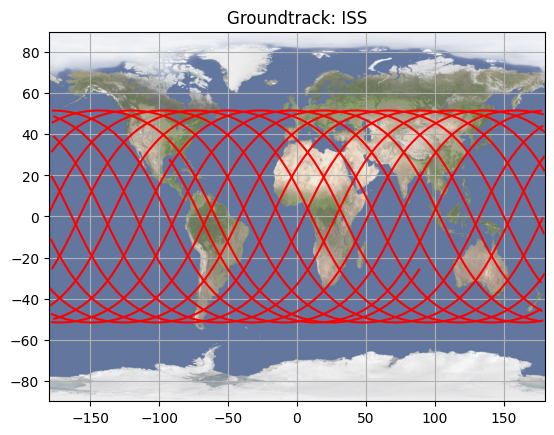

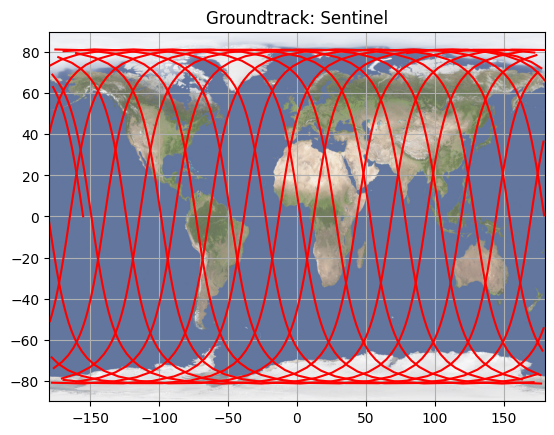

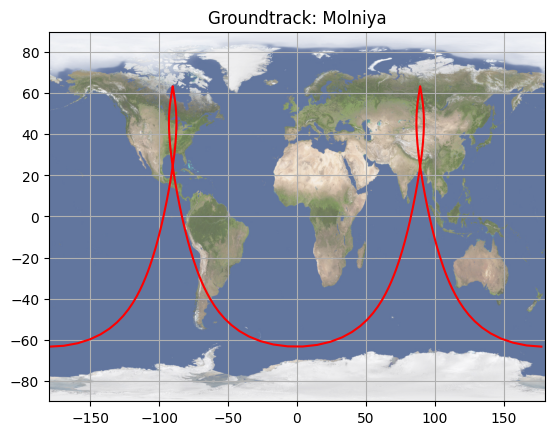

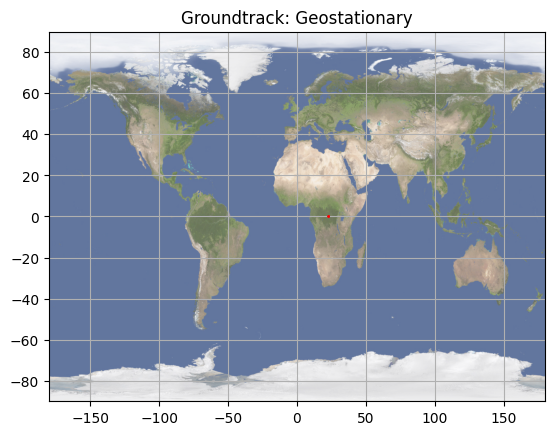

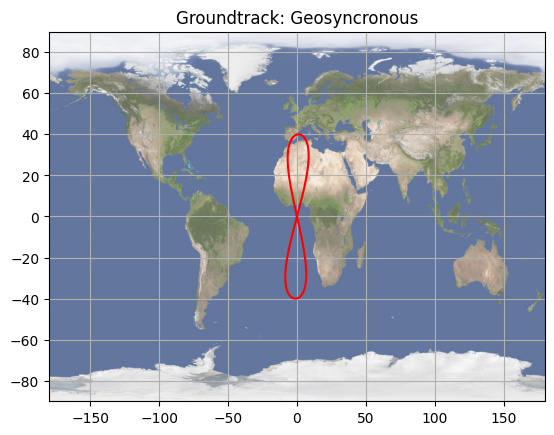

In [3]:
# Compute the groundtrack
for orbitname in orbitdata:
    step = 60 # sec
    duration = 86400 #1 day
    nsteps = int(duration/step)
    [lambda_data, phi_data] = astro.groundtrack(orbitname[0], orbitname[1], step, nsteps, astro.GME)
    
    #Groundtrack plot
    curves_lambda, curves_phi = astro.make_groundtrack_lines(lambda_data,phi_data)
    im = plt.imread("2k_earth_daymap.jpg")
    fig, ax = plt.subplots()
    im = ax.imshow(im, extent=[-180, 180, -90, 90],alpha = 0.7)
    for i in range(len(curves_lambda)):
        ax.plot(np.rad2deg(curves_lambda[i]),np.rad2deg(curves_phi[i]),'-r')
    ax.set_aspect('auto')
    plt.title("Groundtrack: "+orbitname[2])
    plt.grid()
    plt.show()

$\textbf{ISS}$ (International Space Station): ISS completes about 16  orbits around the Eearth each day.

$\textbf{Sentinel Missions}\,\, \textit{Sentinel: a soldier or guard whose job is to stand and keep watch \small{(from Oxford Languages)}}$:  They are earth observation mission from the Copernicus Programme that acquires optical imagery over land and coastal waters. Hence, it is significant that Sentinel satellietes tranverse the hole Earth's land. 

$\textbf{Molniya orbits}$: A Molniya orbit is a satellite orbit designed to provide communications high latitudes.It is a highly elliptical orbit with an inclination of about 63.4 degrees, an argument of perigee of about 270 degrees, and has an orbital period of approximately half a day. A Molniya satellite is mostly above some high land latitudes, such as Russia and America, and travels fast above the others.

$\textbf{Geostationary}\,\, and\,\, \textbf{Geosynchronous\,\, Satellites}$: A geosynchronous orbit has a special position high above the Earth so that it allows an object to keep pace with the rotation of the Earth. On the other hand, a geostationary orbit is a type of geosynchronous orbit. The key difference between a geostationary and a geosynchronous orbit is that while the geosynchronous orbit any inclination, the geosationaty orbit puts satellites permanently 'parked' over the plane of Earth's equator.

In order to have the Geostationary satellite (a = 42164.0, e = 0.0001, i = 0) at the same longitude as Thessaloniki the argument of the pericenter has to be equal to the Greenwich hour angle, and RAAN plus the initial true anomaly must be equal to the lognitude of Thessaloniki (~23). To implement the second qualification, it is important to notice that the inclination is equal to zero. The target of the above suggestions is to ensure that the satellite is initally put exactly at the specific point. Setting the argument of the pericenter has to be equal to the Greenwich hour angle we manage to control the TA=0 point of the trajectory independently from the Greenwich hour. Furthermore, the satellite has to traverse 23&deg; extra, which can be accomplished not only from the initial TA but, in this case, from the RAAN, too.